In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from sklearn.preprocessing import LabelBinarizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from bs4 import BeautifulSoup
import re,string,unicodedata
from keras.preprocessing import text, sequence
from nltk.tokenize.toktok import ToktokTokenizer
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
from nltk import pos_tag
from nltk.corpus import wordnet
import keras
from keras.models import Sequential
from keras.layers import Dense,Embedding,LSTM,Dropout
import tensorflow as tf

Using TensorFlow backend.


In [3]:
df = pd.read_csv("3000tweet/3000tweet.csv", sep=';',encoding="utf8")

In [4]:
df['tweet'] = df['tweet'].str.lower()

In [5]:
df.isna().sum() # Checking for NaN values

tweet    1
durum    0
dtype: int64

In [6]:
df.dropna(inplace=True)

In [7]:
df.isna().sum() # Checking for NaN values

tweet    0
durum    0
dtype: int64

In [8]:
df.head()

,tweet,durum
0,dun turkcelle tepkilerimizden sonra bugün turk...,1
1,girmezmiyim.. turkcell kartim bile var.. yarin...,1
2,tam tünelden gecerken 3g cekiyordu :d türkcell...,1
3,turkcell superonline fiber internet veya adsl ...,1
4,bence gnçtrkcll ark winterfest 2012'de 1.olur ...,1


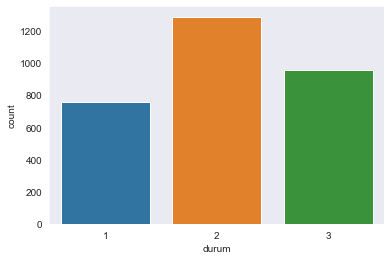

In [9]:
sns.set_style("dark")
sns.countplot(df.durum)

In [10]:
#import nltk
#nltk.download('stopwords')

In [11]:
# C:\Users\onurk\AppData\Roaming\nltk_data\corpora\stopwords
stop = set(stopwords.words('turkish'))
punctuation = list(string.punctuation)
stop.update(punctuation)

In [12]:
#BASIC DATA CLEANING

In [13]:
def strip_html(text):
    soup = BeautifulSoup(text, "html.parser")
    return soup.get_text()

#Removing the square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

# Removing URL's
def remove_between_square_brackets(text):
    return re.sub(r'http\S+', '', text)

#Removing the stopwords from text
def remove_stopwords(text):
    final_text = []
    for i in text.split():
        if i.strip().lower() not in stop:
            final_text.append(i.strip())
    return " ".join(final_text)

#Removing the noisy text
def denoise_text(text):
    text = strip_html(text)
    text = remove_between_square_brackets(text)
    text = remove_stopwords(text)
    return text

#Apply function on review column
df['tweet']=df['tweet'].apply(denoise_text)

In [14]:
df[:10]

,tweet,durum
0,dun turkcelle tepkilerimizden sonra bugün turk...,1
1,girmezmiyim.. turkcell kartim bile var.. yarin...,1
2,tam tünelden gecerken 3g cekiyordu :d türkcell...,1
3,turkcell superonline fiber internet adsl sabit...,1
4,bence gnçtrkcll ark winterfest 2012'de 1.olur ...,1
5,turkcell sana kıyak geçiyor :d,1
6,turkcelle bağlan hayata diyorum ;))),1
7,"kimse takmıyo beni yaaaaa, turkcell bana mesaj...",1
8,turkcell pusula uygulaması iphone kullanıcılar...,1
9,zaman sorun yok bende turkcell iyi bir tarife ...,1


In [13]:
words = []
for i in df.tweet.values:
    l = []
    for j in i.split():
        l.extend(i.split())
        break
    words.append(l)

In [14]:
import gensim
#Dimension of vectors we are generating
EMBEDDING_DIM = 100

#Creating Word Vectors by Word2Vec Method (takes time...)
w2v_model = gensim.models.Word2Vec(words , size=EMBEDDING_DIM , window = 5 , min_count = 1)

In [15]:
words

[['dun',
  'turkcelle',
  'tepkilerimizden',
  'sonra',
  'bugün',
  'turkcell',
  'twittera',
  'sponsor',
  'olmuş.',
  'tesadüf',
  'değil',
  'mi',
  ':)'],
 ['girmezmiyim..',
  'turkcell',
  'kartim',
  'bile',
  'var..',
  'yarindan',
  'itibaren',
  'onu',
  'takicam..',
  'twittersiz',
  'denedim',
  'sadece',
  '3',
  'gun',
  'yapabildim:)))))'],
 ['tam',
  'tünelden',
  'gecerken',
  '3g',
  'cekiyordu',
  ':d',
  "türkcell'in",
  'reklamlari',
  "vodafone'",
  'harekete',
  'gecirmis',
  'olmali:)'],
 ['turkcell',
  'superonline',
  'fiber',
  'internet',
  'adsl',
  'sabit',
  'telefon',
  'hizmetleri'],
 ['bence',
  'gnçtrkcll',
  'ark',
  'winterfest',
  "2012'de",
  '1.olur',
  'gelir',
  ':)'],
 ['turkcell', 'sana', 'kıyak', 'geçiyor', ':d'],
 ['turkcelle', 'bağlan', 'hayata', 'diyorum', ';)))'],
 ['kimse',
  'takmıyo',
  'beni',
  'yaaaaa,',
  'turkcell',
  'bana',
  'mesaj',
  'aaat',
  ':d'],
 ['turkcell',
  'pusula',
  'uygulaması',
  'iphone',
  'kullanıcıları',
 

In [16]:
#vocab size
len(w2v_model.wv.vocab)
#We have now represented each of 38071 words by a 100dim vector.

14332

In [17]:
w2v_model.wv.vocab

{'dun': <gensim.models.keyedvectors.Vocab at 0x2c6d6472488>,
 'turkcelle': <gensim.models.keyedvectors.Vocab at 0x2c6d650e6c8>,
 'tepkilerimizden': <gensim.models.keyedvectors.Vocab at 0x2c6d650e708>,
 'sonra': <gensim.models.keyedvectors.Vocab at 0x2c6d650e748>,
 'bugün': <gensim.models.keyedvectors.Vocab at 0x2c6d650e7c8>,
 'turkcell': <gensim.models.keyedvectors.Vocab at 0x2c6d650e848>,
 'twittera': <gensim.models.keyedvectors.Vocab at 0x2c6d650e888>,
 'sponsor': <gensim.models.keyedvectors.Vocab at 0x2c6d650e8c8>,
 'olmuş.': <gensim.models.keyedvectors.Vocab at 0x2c6d650e788>,
 'tesadüf': <gensim.models.keyedvectors.Vocab at 0x2c6d650e808>,
 'değil': <gensim.models.keyedvectors.Vocab at 0x2c6d650e908>,
 'mi': <gensim.models.keyedvectors.Vocab at 0x2c6d650e948>,
 ':)': <gensim.models.keyedvectors.Vocab at 0x2c6d650e988>,
 'girmezmiyim..': <gensim.models.keyedvectors.Vocab at 0x2c6d650e9c8>,
 'kartim': <gensim.models.keyedvectors.Vocab at 0x2c6d650ea08>,
 'bile': <gensim.models.keyed

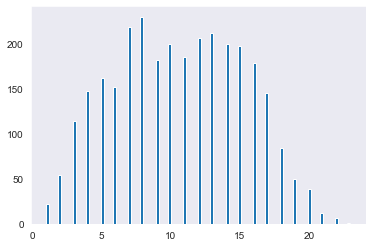

In [18]:
# Making histogram for no of words in news shows that all news article are under 20 words.
# Lets keep each news small and truncate all news to 20 while tokenizing
plt.hist([len(j) for j in words], bins = 100)
plt.show()

In [29]:
tokenizer = text.Tokenizer(num_words=35000)
tokenizer.fit_on_texts(words)
tokenized_train = tokenizer.texts_to_sequences(words)
x = sequence.pad_sequences(tokenized_train, maxlen = 20)

In [30]:
# Adding 1 because of reserved 0 index
# Embedding Layer creates one more vector for "UNKNOWN" words, or padded words (0s). This Vector is filled with zeros.
# Thus our vocab size inceeases by 1
vocab_size = len(tokenizer.word_index) + 1

In [31]:
vocab_size

14333

In [32]:
# Function to create weight matrix from word2vec gensim model
def get_weight_matrix(model, vocab):
    # total vocabulary size plus 0 for unknown words
    vocab_size = len(vocab) + 1
    # define weight matrix dimensions with all 0
    weight_matrix = np.zeros((vocab_size, EMBEDDING_DIM))
    # step vocab, store vectors using the Tokenizer's integer mapping
    for word, i in vocab.items():
        weight_matrix[i] = model[word]
    return weight_matrix

In [33]:
#Getting embedding vectors from word2vec and usings it as weights of non-trainable keras embedding layer
embedding_vectors = get_weight_matrix(w2v_model, tokenizer.word_index)

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  if __name__ == '__main__':


In [34]:
#TRAINING WORD2VEC MODEL

In [35]:
#Defining Neural Network
model = Sequential()
#Non-trainable embeddidng layer
model.add(Embedding(vocab_size, output_dim=EMBEDDING_DIM, weights=[embedding_vectors], input_length=20, trainable=True))
#LSTM 
model.add(LSTM(units=128))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

del embedding_vectors

In [36]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 20, 100)           1433300   
_________________________________________________________________
lstm_2 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 129       
Total params: 1,550,677
Trainable params: 1,550,677
Non-trainable params: 0
_________________________________________________________________


In [73]:
x_train, x_test, y_train, y_test = train_test_split(x, df.durum , test_size = 0.3 , random_state = 100)
print(y_train)

150     1
91      1
2500    3
2752    3
2422    3
       ..
1930    2
79      1
1859    2
2840    3
1544    2
Name: durum, Length: 2099, dtype: int64


In [74]:
print("Accuracy of the model on Training Data is - " , model.evaluate(x_train,y_train)[1]*100)
print("Accuracy of the model on Testing Data is - " , model.evaluate(x_test,y_test)[1]*100)

2099/2099 [==============================] - 0s 148us/step
Accuracy of the model on Training Data is -  24.392567574977875
900/900 [==============================] - 0s 132us/step
Accuracy of the model on Testing Data is -  27.11111009120941


In [75]:
#ANALYSIS AFTER TRAINING OF WORD2VEC MODEL

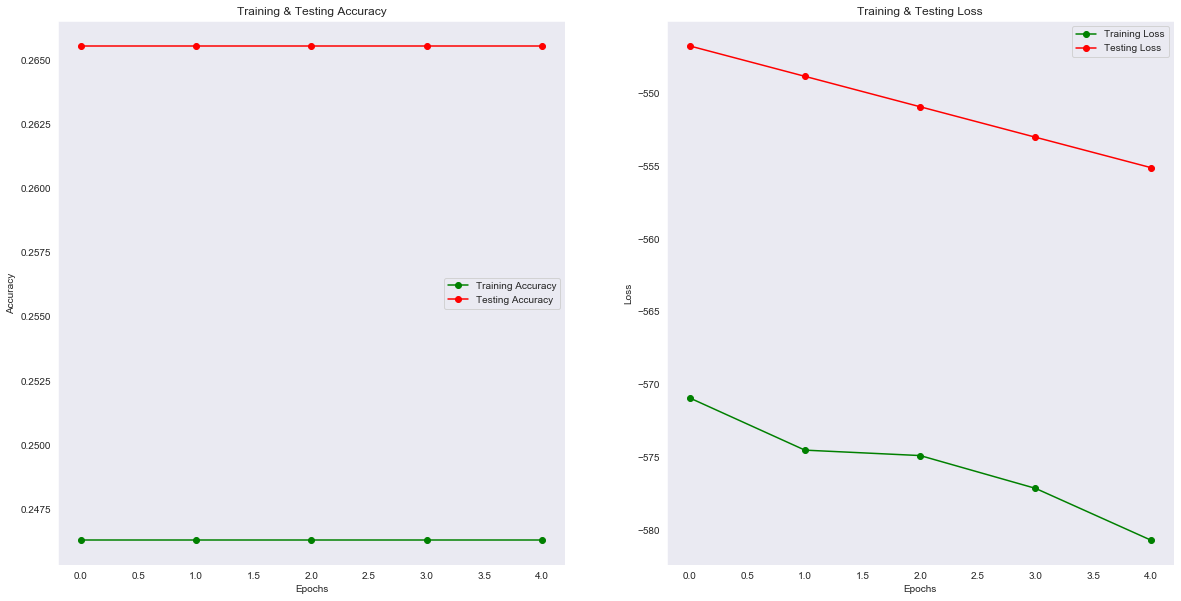

In [76]:
epochs = [i for i in range(5)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['acc']
train_loss = history.history['loss']
val_acc = history.history['val_acc']
val_loss = history.history['val_loss']
fig.set_size_inches(20,10)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Testing Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'go-' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'ro-' , label = 'Testing Loss')
ax[1].set_title('Training & Testing Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [77]:
pred = model.predict_classes(x_test)
pred[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [78]:
cm = confusion_matrix(y_test,pred)
cm

array([[244,   0,   0],
       [390,   0,   0],
       [266,   0,   0]], dtype=int64)

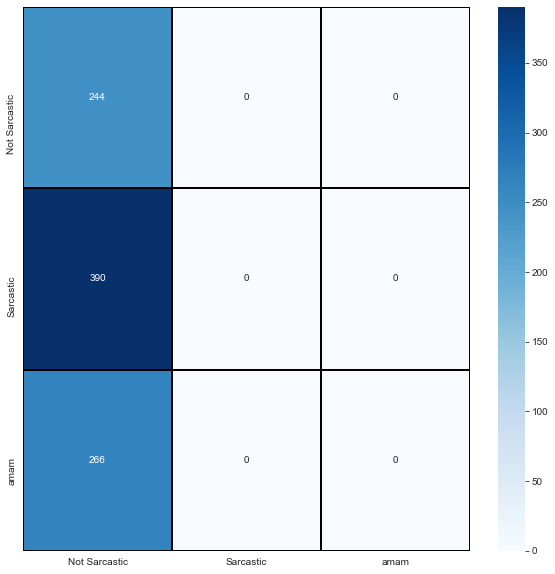

In [79]:
cm = pd.DataFrame(cm , index = ['Not Sarcastic','Sarcastic','amam'] , columns = ['Not Sarcastic','Sarcastic','amam'])
plt.figure(figsize = (10,10))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='' , xticklabels = ['Not Sarcastic','Sarcastic','amam'] , yticklabels = ['Not Sarcastic','Sarcastic','amam'])

In [80]:
#Glove